# NPCI MLOps Playground Challenge - 4 

[Total: 20 Marks]

## Problem Statement 

Develop a machine learning model that predicts the likelihood of a borrower defaulting on a loan based on factors such as credit history, repayment capacity, and annual income. This model aims to assist financial institutions in assessing the potential financial impact of credit risk and making informed lending decisions.

## Credit Risk Prediction

Credit Risk refers to the likelihood of a borrower failing to repay a loan, leading to potential financial losses for the lender. When financial institutions extend services like mortgages, credit cards, or personal loans, there exists an inherent risk that the borrower may default on their repayment obligations. To evaluate this risk, factors like credit history, repayment capacity, loan terms, and annual income can be considered.

Many companies, especially financial institutions, evaluate the credit risk of their existing and forthcoming customers. With the advent of technologies like machine learning, organizations can analyze customer data to establish a risk profile. Credit risk modeling evaluates a borrower's credit risk based primarily on two factors. The first factor is determining the probability of a borrower defaulting on a loan, while the second factor involves evaluating the financial impact on the lender in case of such a default.



## Dataset Description

The dataset you'll be working with is the Credit Risk dataset, which includes the following features:

* **person_age** - Age
* **person_income** - Annual Income
* **person_home_ownership** - Home ownership
* **person_emp_length** - Employment length (in years)
* **loan_intent** - Loan intent
* **loan_grade** - Loan grade
* **loan_amnt** - Loan amount
* **loan_int_rate** - Interest rate
* **loan_status** - Loan status (0 is non default 1 is default)
* **loan_percent_income** - Percent income
* **cb_person_default_on_file** - Historical default
* **cb_preson_cred_hist_length** - Credit history length


### Importing required packages  [1 Mark]


In [17]:
# ToDo
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data  [1 Mark]

In [3]:
# First upload the provided `credit_risk_dataset.csv` then load it as pandas dataframe
# ToDo
df = pd.read_csv('credit_risk_dataset.csv')

### EDA [2 Marks] 

Explore the data, understand the features and handle the missing values.

In [4]:
# Get the shape of the dataframe
# ToDo
df.shape

(32581, 12)

In [5]:
# Display few rows of the dataframe
# ToDo
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [6]:
# Generate descriptive statistics for the DataFrame, to get summary statistics for numerical columns.
# ToDo
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
# Generate information about the DataFrame, including index details, column data types, and non-null values.
# ToDo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Data Preprocessing

#### Handling Missing values  [1 Mark]

In [8]:
# Display the total number of null values of each column
# ToDo
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Columns **person_emp_length** and **loan_int_rate** have null values.
Handle them by replacing the missing values with the mean of the respective columns.


In [9]:
# Handle missing values - replace the missing values with the mean value of that numerical feature
# ToDo
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#### Handling categorical columns [3 Marks]

In [10]:
# Check for categorical columns
# ToDo
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [11]:
# Get the distinct categories present in each categorical column
# ToDo
unique_categories = {col: df[col].unique().tolist() for col in categorical_columns}
print(unique_categories)

{'person_home_ownership': ['RENT', 'OWN', 'MORTGAGE', 'OTHER'], 'loan_intent': ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'], 'loan_grade': ['D', 'B', 'C', 'A', 'E', 'F', 'G'], 'cb_person_default_on_file': ['Y', 'N']}


In [12]:
# Create dictionaries to map categorical values to numbers. OR Use LabelEncoder
# ToDo
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = encoder.fit_transform(df[col])

print(df)

       person_age  person_income  person_home_ownership  person_emp_length  \
0              22          59000                      3              123.0   
1              21           9600                      2                5.0   
2              25           9600                      0                1.0   
3              23          65500                      3                4.0   
4              24          54400                      3                8.0   
...           ...            ...                    ...                ...   
32576          57          53000                      0                1.0   
32577          54         120000                      0                4.0   
32578          65          76000                      3                3.0   
32579          56         150000                      0                5.0   
32580          66          42000                      3                2.0   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_

In [ ]:
# Map categorical values to numbers using respective dictionaries
# ToDo

In [13]:
# Display the data to observe the changes
# ToDo
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


#### Get/Visualize the count of each classes(defaulter or Not) to understand class distribution [1 Mark]

cb_person_default_on_file
0    26836
1     5745
Name: count, dtype: int64


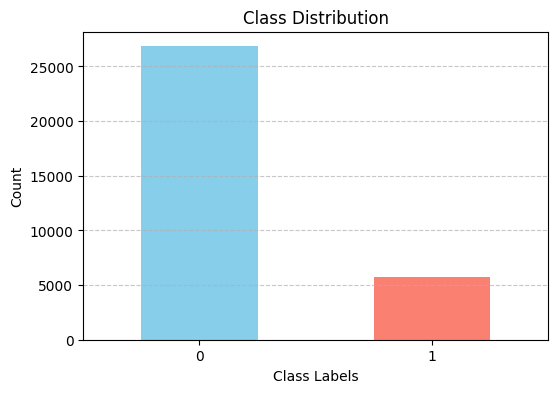

In [18]:
# Calculate the class distribution
# ToDo
class_distribution = df['cb_person_default_on_file'].value_counts()

# Display results
print(class_distribution)
# Create a bar plot
# ToDo
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Define target variable and features [1 Mark]

In [21]:
# Define features(X) and target variable(y)
# ToDo
y = df['cb_person_default_on_file']
x = df.drop(columns = ['cb_person_default_on_file'])

### Train-Test split [1 Mark]

In [22]:
# Split the data into training and testing sets
# Use `stratify` parameter to maintain the class distribution across the training and testing set
# ToDo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)


### Check the class distribution in the training and test sets [1 Mark]

Ensure that both sets have same target class distribution as of the original dataset

In [25]:
# Calculate the class distribution in the training set
# ToDo
y_train.value_counts()

cb_person_default_on_file
0    21468
1     4596
Name: count, dtype: int64

In [26]:
# Calculate the class distribution in the testing set
# ToDo
y_test.value_counts()

cb_person_default_on_file
0    5368
1    1149
Name: count, dtype: int64

### Feature Scaling [1 Mark]

In [27]:
# Initialize StandardScaler and transform the training and testing features
# ToDo
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training [3 Mars]


In [28]:
# Initialize the LogisticRegression model
# ToDo
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

# Fit the model with the scaled training data
log_reg.fit(X_train_scaled, y_train)




LogisticRegression(random_state=42)

In [32]:
# Initialize the DecisionTreeClassifier model
# ToDo
from sklearn.tree import DecisionTreeClassifier
# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
# ToDo
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model with the unscaled training data
dt_model.fit(X_train_scaled , y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Initialize the RandomForestClassifier model
# ToDo
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model with the unscaled training data
rf_model.fit(X_train_scaled , y_train)


RandomForestClassifier(random_state=42)

### Model Evaluation [2 Marks]


In [33]:
# Make predictions on the test set with each of the models above
# ToDo
y_pred_dt = dt_model.predict(X_test_scaled)

y_pred_rf = rf_model.predict(X_test_scaled)

y_pred_log_reg = log_reg.predict(X_test_scaled)

In [34]:
# Evaluate each of the model performance

# Show accuracy, f1 score, precision, & recall for each of the trained models
# ToDo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'weighted' for multiclass
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 40)

# Evaluate Logistic Regression (trained on scaled data)
evaluate_model(log_reg, X_test_scaled, y_test)

# Evaluate Decision Tree (trained on unscaled data)
evaluate_model(dt_model, X_test, y_test)

# Evaluate Random Forest (trained on unscaled data)
evaluate_model(rf_model, X_test, y_test)

Model: LogisticRegression
Accuracy: 0.8254
F1 Score: 0.8113
Precision: 0.8045
Recall: 0.8254
----------------------------------------
Model: DecisionTreeClassifier
Accuracy: 0.5061
F1 Score: 0.5444
Precision: 0.8701
Recall: 0.5061
----------------------------------------
Model: RandomForestClassifier
Accuracy: 0.7824
F1 Score: 0.7351
Precision: 0.7029
Recall: 0.7824
----------------------------------------


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Inference [2 Marks]

In [ ]:
# Create a sample input dictionary with keys as feature names and values as feature values
# ToDo

# Convert the sample input dictionary into a dataframe to feed to the model
# ToDo

In [ ]:
# Define a simple fuction to make prediction for the sample input (use the best model among the above trained models)
# ToDo

In [ ]:
# Make prediction using the defined function using the sample input
# ToDo